In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import kaepora as kpora
import flux_calibration as fc
import composite
import numpy as np

In [231]:
# query_test = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where (Flux_Cal_Scale > 0 and Spectra.SN = '2007on') or (Spectra.SN = '2004ef' and Flux_Cal_Scale > 0)"
query_test = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where Spectra.SN = '2004ef' and Flux_Cal_Scale > 0"
# query_test = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where Spectra.SN = '2008bf' and Flux_Cal_Scale > 0"
# query_test = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where (Flux_Cal_Scale > 0 and Spectra.SN = '2008bf') or (Spectra.SN = '2005m' and Flux_Cal_Scale > 0)"
spec_array_test = kpora.grab(query_test, multi_epoch = True, make_corr = True, verbose=True)
for spec in spec_array_test:
    spec = fc.MW_correction(spec, undo=True)
spec_array_test = composite.prelim_norm(spec_array_test) #flux cal scalings are based off pre-MW corrected, normalized spectra

Using: ../data/kaepora_v1.db
25 Total Spectra found
1 flagged spectra removed 24 spectra left
0 spectra of peculiar Ias removed 24 spectra left
24 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
2004ef sn2004ef-20040910.310-ui-corrected.flm bsnip 50.7512194353 -5.1019170987 53258.31 53263.57 0.030985 12.0 3264.0 10134.0
2004ef sn2004ef-20040924.302-ui-corrected.flm bsnip 16.6619407908 8.46957036233 53272.302 53263.57 0.030985 12.0 3274.0 10134.0
2004ef sn2004ef-20041018-br-corrected.flm bsnip 50.9171754968 31.645465259 53296.196 53263.57 0.030985 12.0 3030.0 9066.0
2004ef sn2004ef-20041114-br.flm bsnip 7.67355545718 57.6439036455 53323.0 53263.57 0.030985 12.0 3196.0 9066.0
2004ef sn2004ef-20040907.30-fast.flm cfa 13.5484176256 -8.02145521031 53255.3 53263.57 0.030985 12.0 3428.0 7140.0
2004ef sn2004ef-20040908.35-fast.flm cfa 12.9240376014 -7.003011683 53256.35 53263.57 0.030985 12.0 3396.0

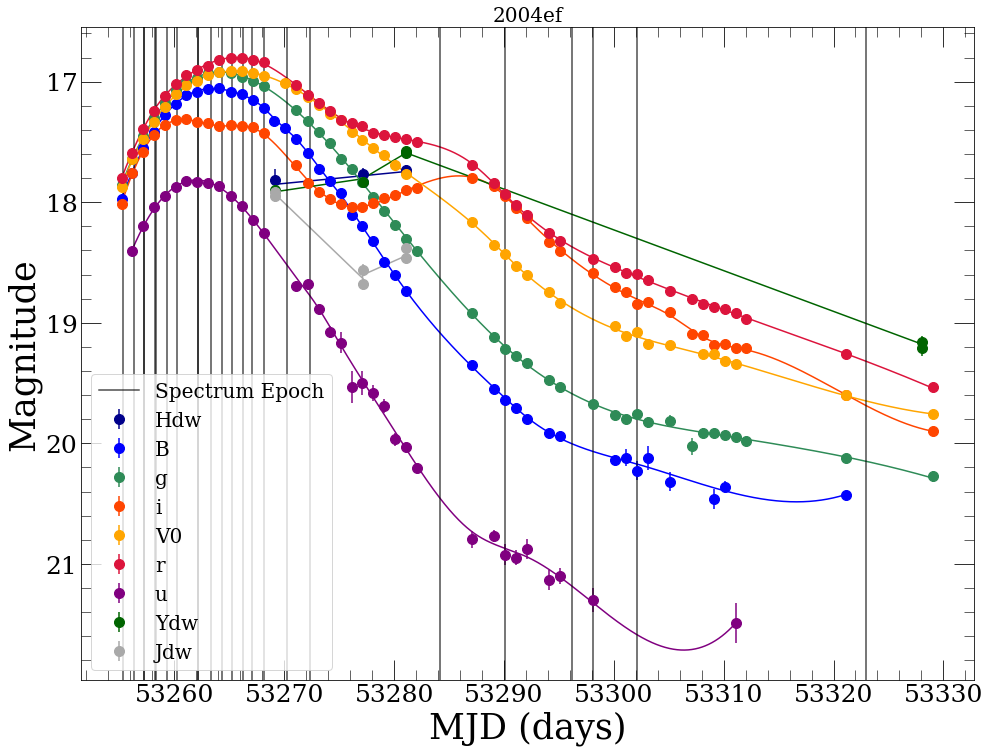

In [232]:
phot = spec_array_test[0].homog_light_curves
mjds = []
for spec in spec_array_test:
    mjds.append(spec.mjd)
fc.plot_light_curves(phot, spec.name, spec_dates = mjds, fit=True)

In [233]:
for spec in spec_array_test:
    print spec.filename, spec.other_spectral_data['Flux_Cal_Scale']
    spec.flux *= spec.other_spectral_data['Flux_Cal_Scale']
    spec.ivar /= spec.other_spectral_data['Flux_Cal_Scale']**2.

sn2004ef-20040910.310-ui-corrected.flm 1.203125e-15
sn2004ef-20040924.302-ui-corrected.flm 9.765625e-16
sn2004ef-20041018-br-corrected.flm 2.05078125e-16
sn2004ef-20041114-br.flm 2.40234375e-16
sn2004ef-20040907.30-fast.flm 1.1171875e-15
sn2004ef-20040908.35-fast.flm 2.0625e-15
sn2004ef-20040909.24-fast.flm 1.5e-15
sn2004ef-20040910.27-fast.flm 1.203125e-15
sn2004ef-20040911.34-fast.flm 1.28125e-15
sn2004ef-20040912.28-fast.flm 1.375e-15
sn2004ef-20040914.18-fast.flm 1.5e-15
sn2004ef-20040915.30-fast.flm 1.625e-15
sn2004ef-20040916.34-fast.flm 1.515625e-15
sn2004ef-20040917.27-fast.flm 1.53125e-15
sn2004ef-20040918.28-fast.flm 1.765625e-15
sn2004ef-20040922.22-fast.flm 1.09375e-15
sn2004ef-20041006.17-fast.flm 4.53125e-16
sn2004ef-20041012.14-fast.flm 3.125e-16
sn2004ef-20041020.15-fast.flm 3.7109375e-16
SN04ef_040909_b01_CLA_LD.dat 1.515625e-15
SN04ef_040914_b01_DUP_WF.dat 1.3125e-15
SN04ef_040919_b01_DUP_WF.dat 1.125e-15
SN04ef_040920_b01_DUP_WF.dat 1.21875e-15
SN04ef_041024_b01_CLA_

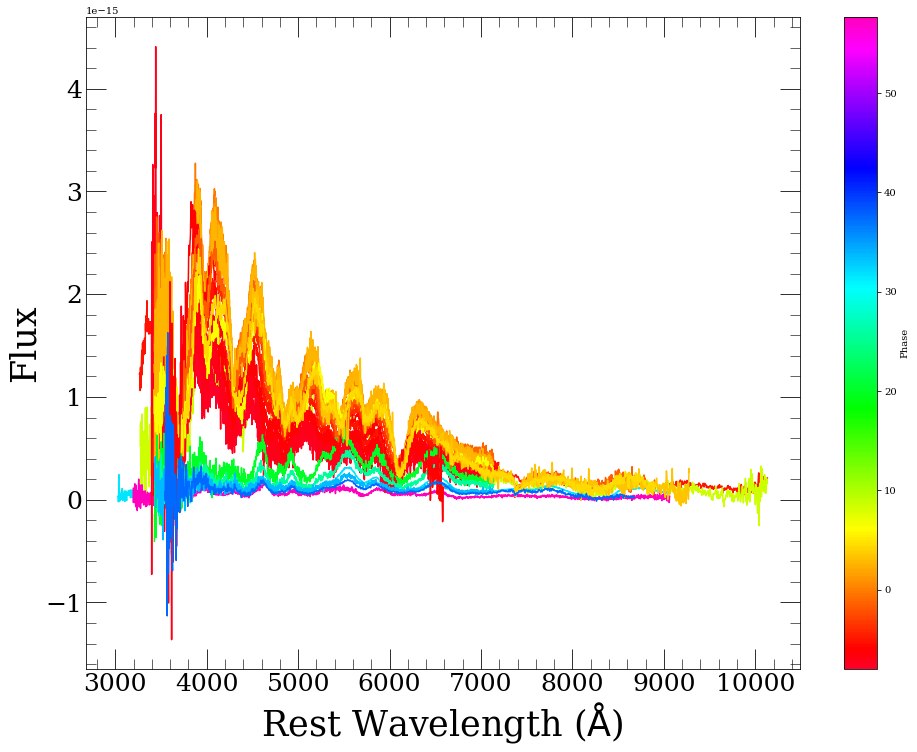

In [234]:
for spec in spec_array_test:
    spec = fc.MW_correction(spec, undo=False)
    spec = fc.host_correction(spec, undo=False)
fc.plot_spectra(spec_array_test)

2004ef 1.39 0.030985
sn2004ef-20040910.310-ui-corrected.flm 168590921300020.28
sn2004ef-20040924.302-ui-corrected.flm 168590921300020.28
sn2004ef-20041018-br-corrected.flm 168590921300020.28
sn2004ef-20041114-br.flm 168590921300020.28
sn2004ef-20040907.30-fast.flm 168590921300020.28
sn2004ef-20040908.35-fast.flm 168590921300020.28
sn2004ef-20040909.24-fast.flm 168590921300020.28
sn2004ef-20040910.27-fast.flm 168590921300020.28
sn2004ef-20040911.34-fast.flm 168590921300020.28
sn2004ef-20040912.28-fast.flm 168590921300020.28
sn2004ef-20040914.18-fast.flm 168590921300020.28
sn2004ef-20040915.30-fast.flm 168590921300020.28
sn2004ef-20040916.34-fast.flm 168590921300020.28
sn2004ef-20040917.27-fast.flm 168590921300020.28
sn2004ef-20040918.28-fast.flm 168590921300020.28
sn2004ef-20040922.22-fast.flm 168590921300020.28
sn2004ef-20041006.17-fast.flm 168590921300020.28
sn2004ef-20041012.14-fast.flm 168590921300020.28
sn2004ef-20041020.15-fast.flm 168590921300020.28
SN04ef_040909_b01_CLA_LD.dat 1

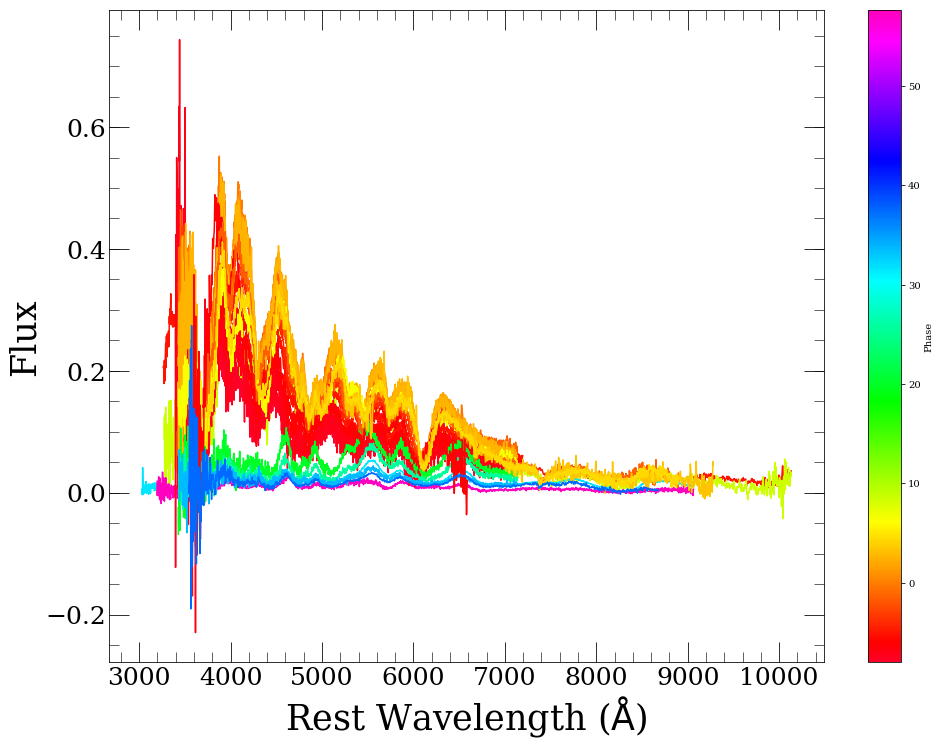

In [235]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=73.24 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

abs_scales = {}
for spec in spec_array_test:
    if spec.name not in abs_scales.keys():
        print spec.name, spec.dm15, spec.redshift
        D = cosmo.luminosity_distance(spec.redshift).value
        scale = 10**((5.-5.*np.log10(D*1e6))/(-2.5))
        abs_scales[spec.name] = scale

for spec in spec_array_test:
    print spec.filename, abs_scales[spec.name]
    spec.flux *= abs_scales[spec.name]
    spec.ivar /= abs_scales[spec.name]**2.
fc.plot_spectra(spec_array_test)

In [236]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [237]:
phases = []
waves = []
fluxes = []
colors = []
s_m = fc.make_colorbar(spec_array_test)
for spec in spec_array_test:
    waves.append(spec.wavelength)
    fluxes.append(spec.flux)
    phases.append(np.full(len(spec_array_test[0].wavelength), spec.phase))
    colors.append(s_m.to_rgba(spec.phase))
phases = np.asarray(phases)
waves = np.asarray(waves)
fluxes = np.asarray(fluxes)

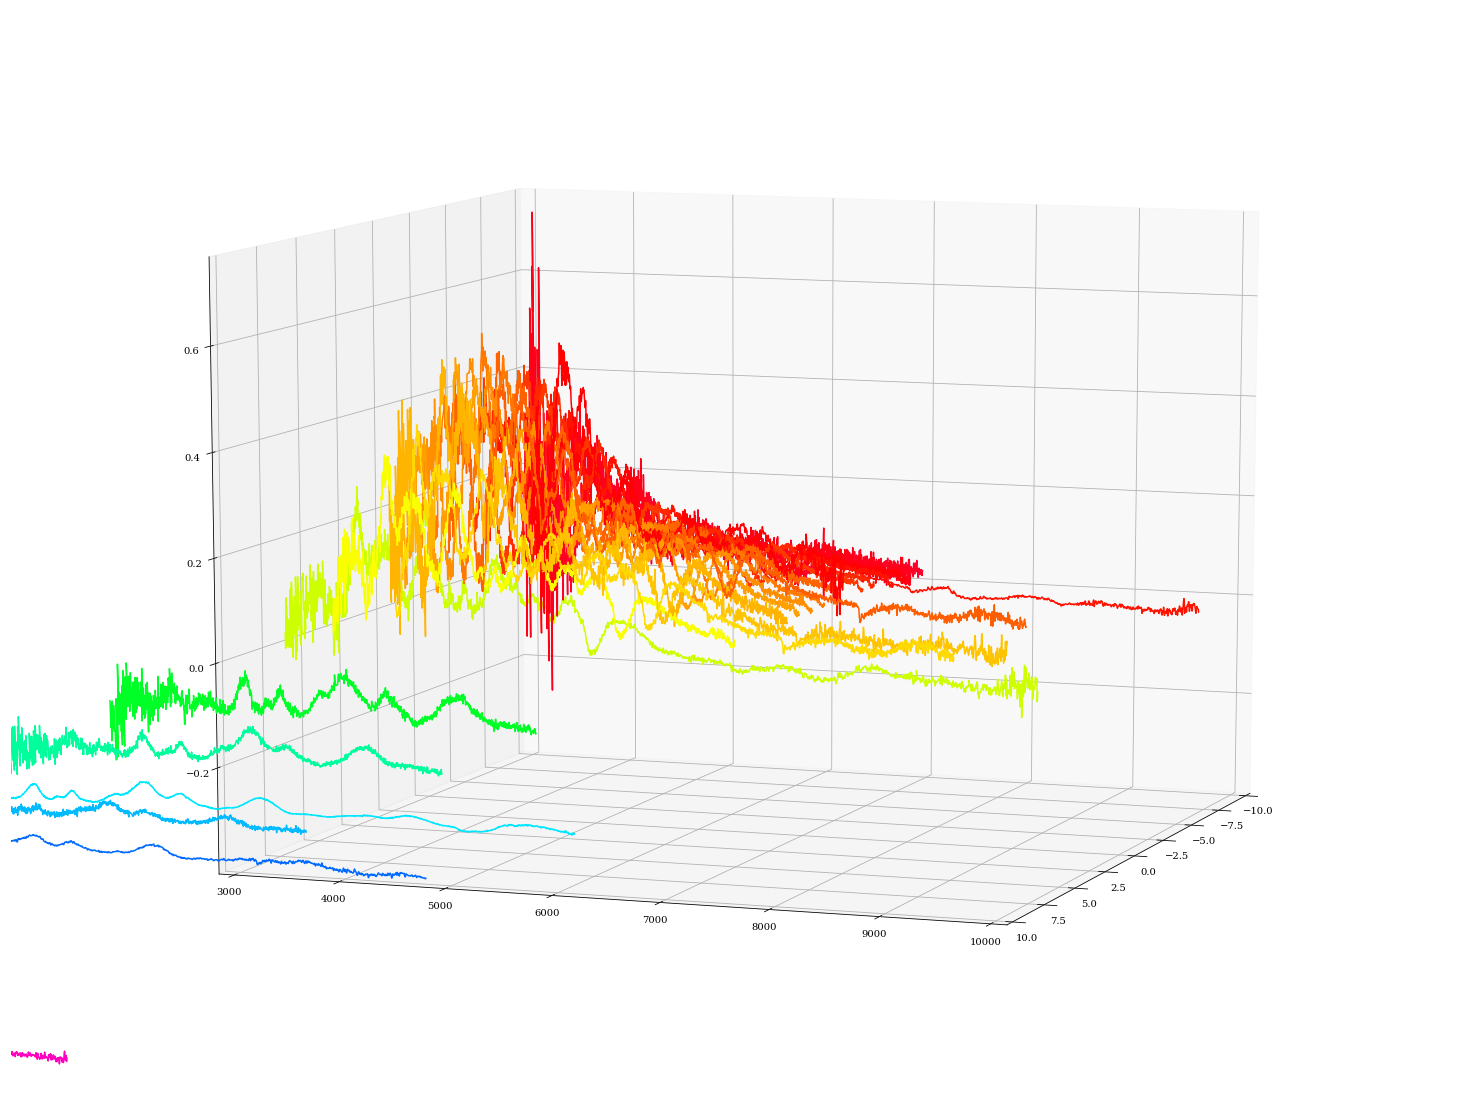

In [238]:
fig = plt.figure(figsize=(20,15))
ax = Axes3D(fig)
ax.plot_wireframe(phases, waves, fluxes, rstride=1, cstride=10000, alpha=1, color = colors)
ax.set_ylim([3000,10000])
ax.set_xlim([-10,10])
ax.view_init(10, 20)
plt.show()

In [239]:
import gp2d_george as gp2d
import prep 

In [240]:
def interpspec(spec_array,dw=100,waverange=[4000,8000],plot=False):
    specnew = {}
    phases = []
    for spec in spec_array:
        snew = {}
        wave = spec.wavelength[spec.x1:spec.x2]
        flux = spec.flux[spec.x1:spec.x2]
        ivar = spec.ivar[spec.x1:spec.x2]
        if plot:
            plt.plot(wave,flux)
        output, scale, var_final = prep.Interpo_flux_conserving(wave,flux,ivar,dw=dw)
        wave,flux,ivar = output[0],output[1],output[2]
        
        idx = np.array((wave>waverange[0]) & (wave<waverange[1]))
        idx_nan = ~np.isnan(flux)
        
        idx_nan_w1 = (wave<spec.wavelength[spec.x1])
        flux[idx_nan_w1] = np.median(flux[idx_nan][0:10])
        print np.median(flux[idx_nan][0:10])
        ivar[idx_nan_w1] = ivar[idx_nan][0]/1e3
        
        idx_nan_w2 = (wave>spec.wavelength[spec.x2])
        flux[idx_nan_w2] = np.median(flux[idx_nan][-10:])
        print np.median(flux[idx_nan][-10:])
        ivar[idx_nan_w2] = ivar[idx_nan][-1]/1e3
        
        snew['wavelength_interp'] = wave[idx]
        snew['flux_interp'] = flux[idx]
        snew['ivar_interp'] = ivar[idx]
        
#         flux[idx_nan] = 0.
#         ivar[idx_nan] = 0.
        
        phase = spec.phase
        phases.append(phase)
        
        specnew[phase] = snew
        if plot:
            plt.plot(wave[idx],flux[idx])
#             plt.plot(wave,flux)
        plt.title(str(phase))
        plt.show()
    return specnew, np.sort(phases), wave[idx]

[3030.0, 10134.0]
10.98478445796964
0.7032598307585329


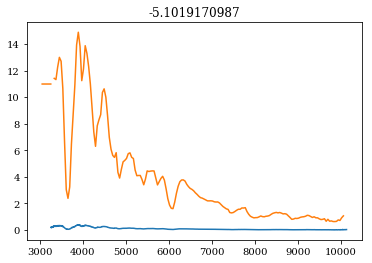

3.958851085581361
0.38750576931700587


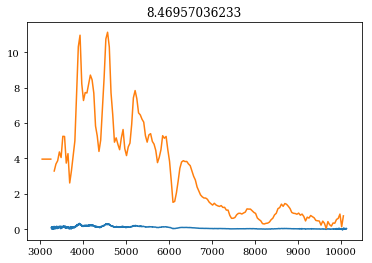

0.3145550371802005
0.6959444826998382


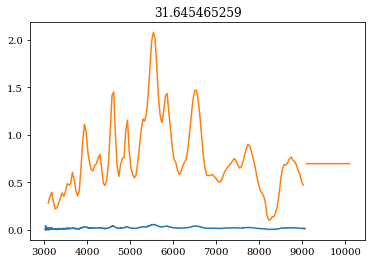

4.380459220265463
1.8828193366439456


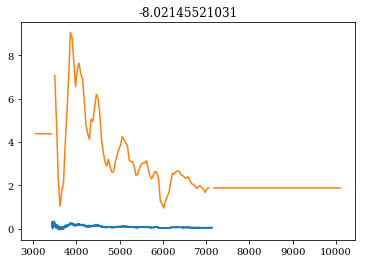

6.3774157118397365
1.9841630619586295


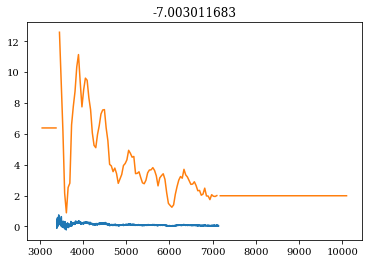

6.9025574091809885
2.3579328064644076


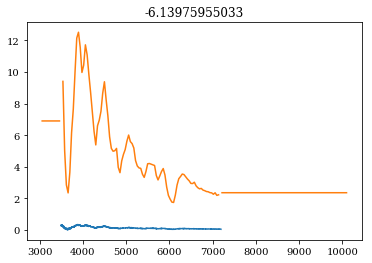

7.368131056305556
2.6794644286946276


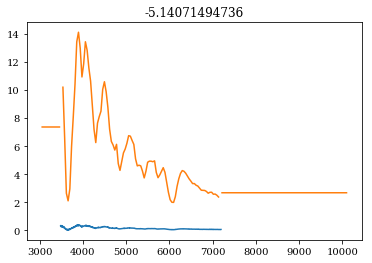

8.976921827121487
2.7786770817659967


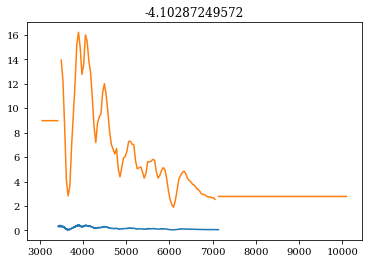

10.063060441016297
2.9075618353386288


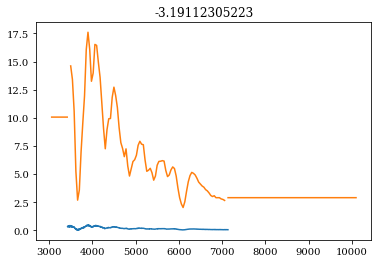

10.976535007079164
3.3221010727422797


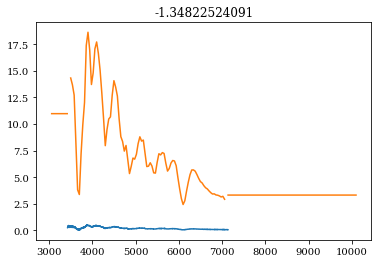

11.328715798942095
2.8213901335819553


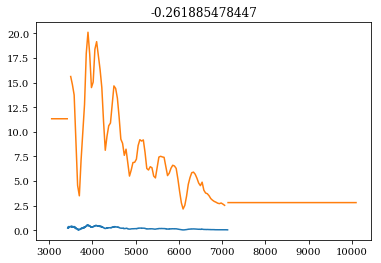

10.291180885914958
2.9723101892785957


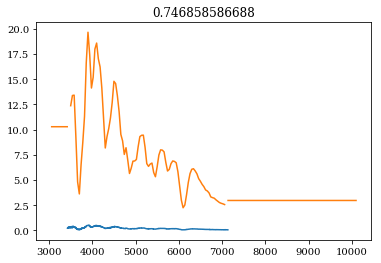

10.189037471515839
3.0321420031367454


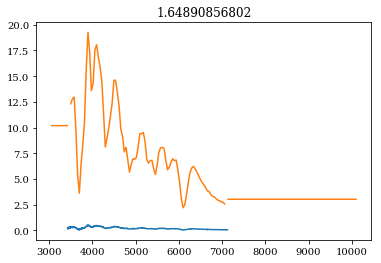

9.625059596580323
2.904676386823235


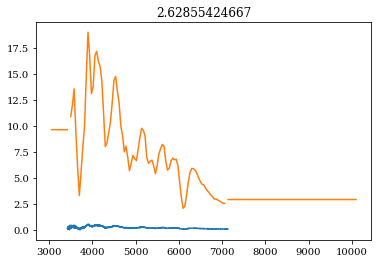

6.495009662416981
2.518141117616744


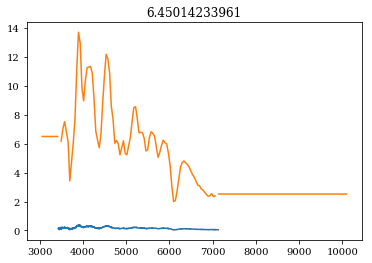

1.7731293029918749
1.3970923540116928


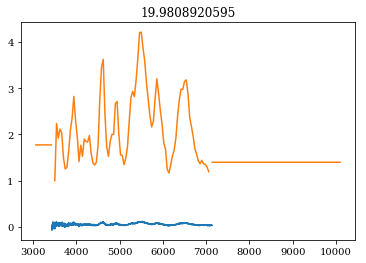

0.8803262774199353
1.1251609626737917


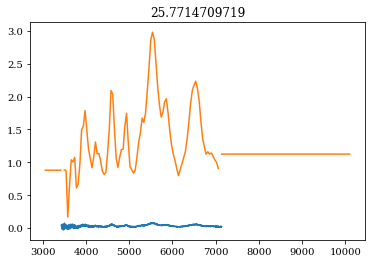

0.8643642616063256
0.5300705506760277


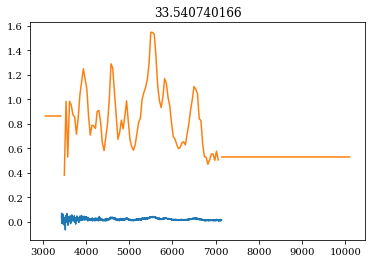

13.80852674172554
2.796728004744498


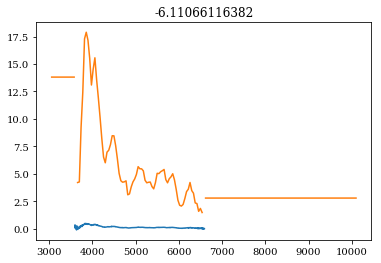

14.396507313215938
1.2169984597207224


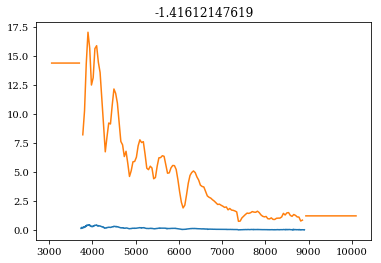

8.537055376646407
0.7346550565814787


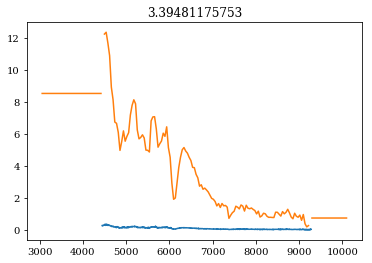

12.107690990534687
1.2963623587036486


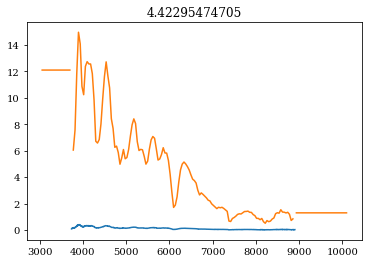

1.0769187147424115
0.17278517631590967


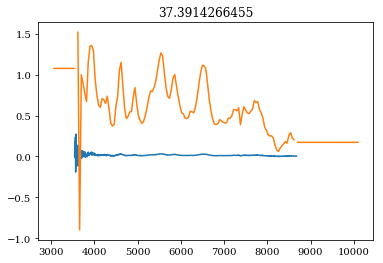

[-8.02145521 -7.00301168 -6.13975955 -6.11066116 -5.14071495 -5.1019171
 -4.1028725  -3.19112305 -1.41612148 -1.34822524 -0.26188548  0.74685859
  1.64890857  2.62855425  3.39481176  4.42295475  6.45014234  8.46957036
 19.98089206 25.77147097 31.64546526 33.54074017 37.39142665]
[ 3059.  3099.  3139.  3179.  3219.  3259.  3299.  3339.  3379.  3419.
  3459.  3499.  3539.  3579.  3619.  3659.  3699.  3739.  3779.  3819.
  3859.  3899.  3939.  3979.  4019.  4059.  4099.  4139.  4179.  4219.
  4259.  4299.  4339.  4379.  4419.  4459.  4499.  4539.  4579.  4619.
  4659.  4699.  4739.  4779.  4819.  4859.  4899.  4939.  4979.  5019.
  5059.  5099.  5139.  5179.  5219.  5259.  5299.  5339.  5379.  5419.
  5459.  5499.  5539.  5579.  5619.  5659.  5699.  5739.  5779.  5819.
  5859.  5899.  5939.  5979.  6019.  6059.  6099.  6139.  6179.  6219.
  6259.  6299.  6339.  6379.  6419.  6459.  6499.  6539.  6579.  6619.
  6659.  6699.  6739.  6779.  6819.  6859.  6899.  6939.  6979.  7019.
  7059.  7

In [241]:
spec_arr_new = []
minwaves = []
maxwaves = []
for spec in spec_array_test:
    minwaves.append(spec.wavelength[spec.x1])
    maxwaves.append(spec.wavelength[spec.x2])
wrange = [np.amin(minwaves), np.amax(maxwaves)]
print wrange

for spec in spec_array_test:
#     if spec.wavelength[spec.x1]<wrange[0] and spec.wavelength[spec.x2]>wrange[1] and spec.phase < 40:
#         spec_arr_new.append(spec)
    if spec.phase < 40:
        spec_arr_new.append(spec)
# specnew, phases, waves = interpspec(spec_arr_new,dw=100,waverange=wrange,plot=True)
specnew, phases, waves = interpspec(spec_arr_new,dw=40,waverange=wrange,plot=True) #decent for 04ef
print phases
print waves

In [242]:
def spec2d(spec):
    nwave = np.shape(spec[list(spec.keys())[0]]['wavelength_interp'])[0]
    nphase = len(list(spec.keys()))
    print(nwave,nphase)
    arr2d = np.ones((nphase*nwave,4))
    for i,phase in enumerate(np.sort(list(spec.keys()))):
        arr2d[i*nwave:(i+1)*nwave,0] = [float(phase)]*nwave
        arr2d[i*nwave:(i+1)*nwave,1] = spec[phase]['wavelength_interp']
        arr2d[i*nwave:(i+1)*nwave,2] = spec[phase]['flux_interp']
        arr2d[i*nwave:(i+1)*nwave,3] = spec[phase]['ivar_interp']
    return arr2d 

In [243]:
spec_arr = spec2d(specnew)
print spec_arr
print np.shape(spec_arr)

(177, 23)
[[-8.02145521e+00  3.05900000e+03  4.38045922e+00  1.51976207e-02]
 [-8.02145521e+00  3.09900000e+03  4.38045922e+00  1.51976207e-02]
 [-8.02145521e+00  3.13900000e+03  4.38045922e+00  1.51976207e-02]
 ...
 [ 3.73914266e+01  1.00190000e+04  1.72785176e-01  3.71954490e+01]
 [ 3.73914266e+01  1.00590000e+04  1.72785176e-01  3.71954490e+01]
 [ 3.73914266e+01  1.00990000e+04  1.72785176e-01  3.71954490e+01]]
(4071, 4)


(10.0, 400.0)
('kernel:k1:log_constant', 'kernel:k2:metric:log_M_0_0', 'kernel:k2:metric:log_M_1_1')
[1.87348118 2.30258509 5.99146455]
Initial ln-likelihood: -9160.66
      fun: 6634.111496681517
 hess_inv: array([[0.0068212 , 0.001985  , 0.00083193],
       [0.001985  , 0.00226865, 0.00020273],
       [0.00083193, 0.00020273, 0.00077202]])
      jac: array([-6.25769774e-07,  2.51614036e-05,  1.06436754e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 112
      nit: 14
     njev: 100
   status: 2
  success: False
        x: array([0.8443576 , 4.07084481, 9.01868467])
Final ln-likelihood: -6634.11


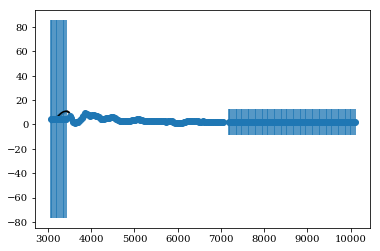

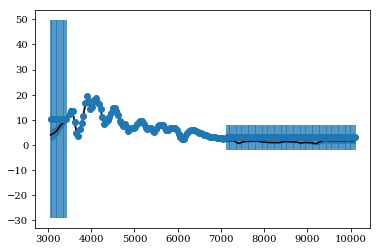

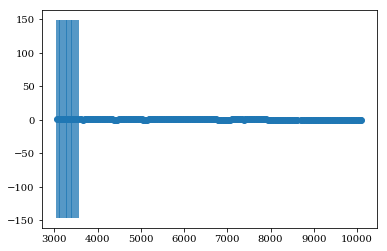

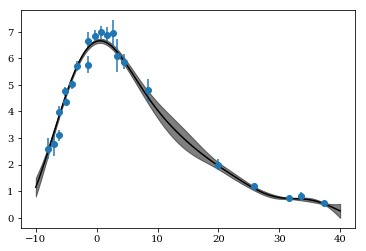

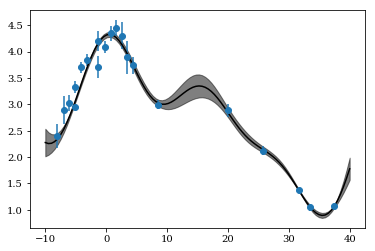

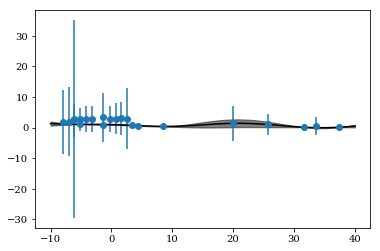

In [244]:
gp, x, y = gp2d.fit_gp_george_2d(spec_arr, phases, waves, printlog=True,plot=True)

In [245]:
phasearr = np.linspace(-10,40,100)
# wavearr = np.linspace(4000,7000,200)
wavearr = np.linspace(waves[0],waves[-1],200)
xv,yv = np.array(np.meshgrid(phasearr,wavearr))
xa = np.stack((xv.ravel(),yv.ravel()),axis=1)
pred_f, pred_var_f = gp.predict(y, xa, return_var=True)

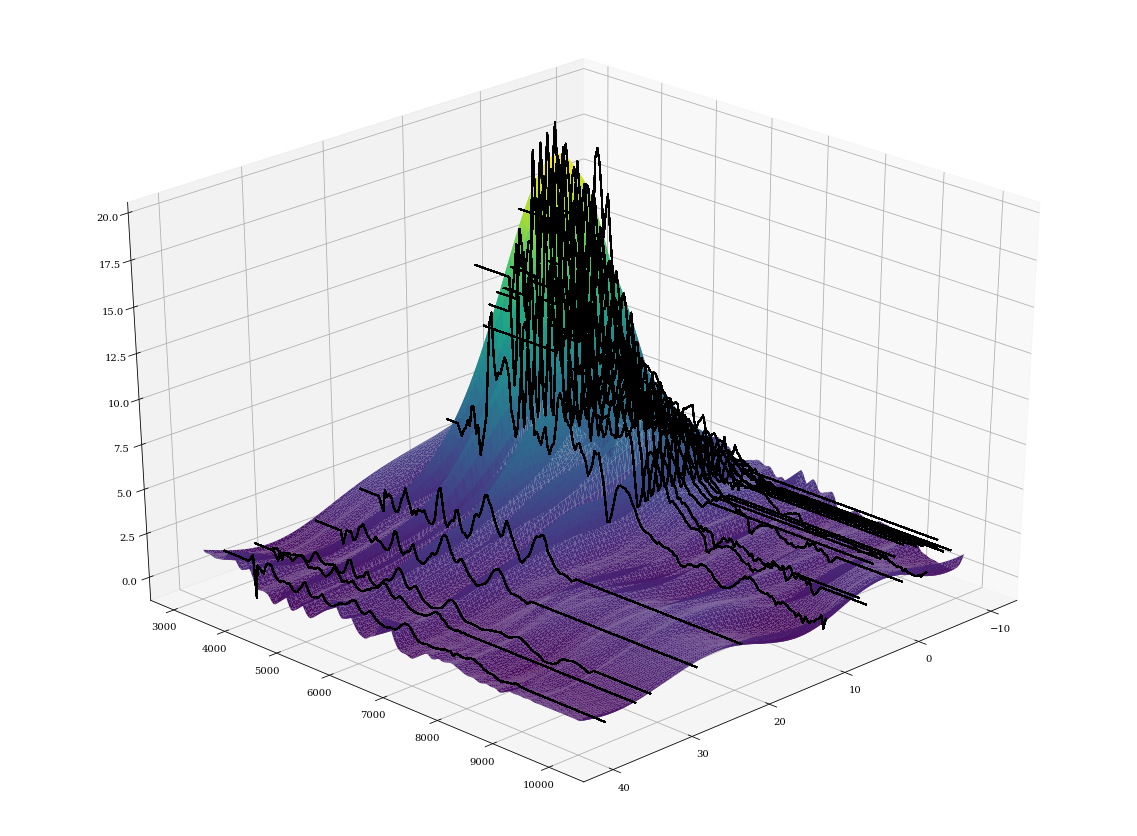

In [246]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.plot_trisurf(xv.ravel(), yv.ravel(), pred_f,cmap='viridis') 
xphase = x[:,0]
xwave = x[:,1]
for p in xphase:
    idx = np.array(xphase==p)
    idx_zero = np.array(y[idx]!=0)
    p_plot = xphase[idx][idx_zero]
    wave_plot = xwave[idx][idx_zero]
    y_plot = y[idx][idx_zero]
    ax.plot3D(p_plot, wave_plot, y_plot,color = 'k', alpha=.1)
ax.view_init(30, 45)
plt.show()

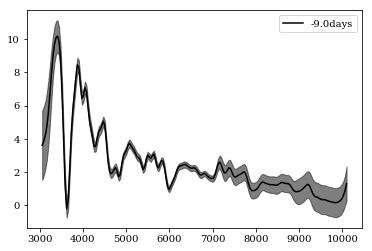

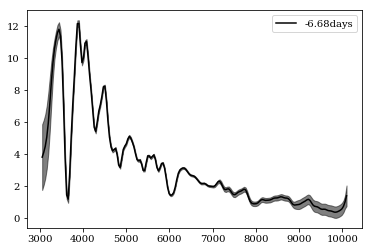

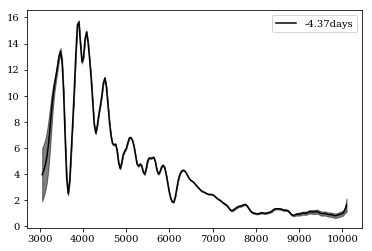

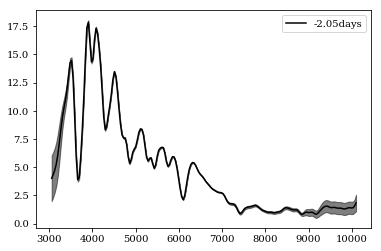

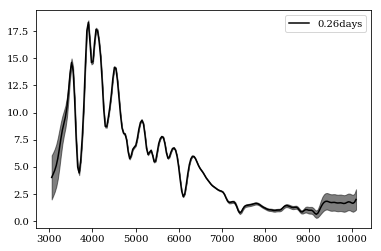

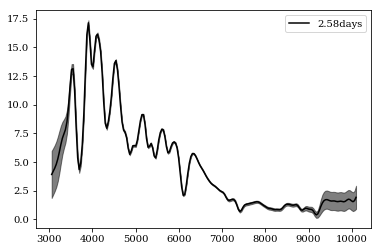

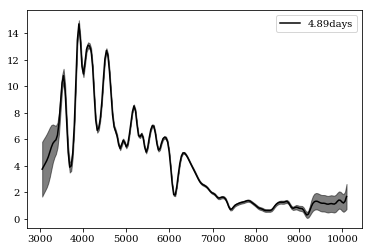

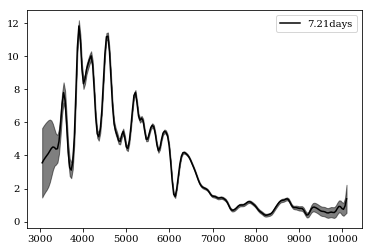

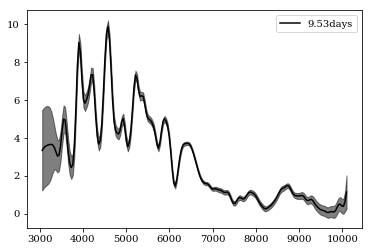

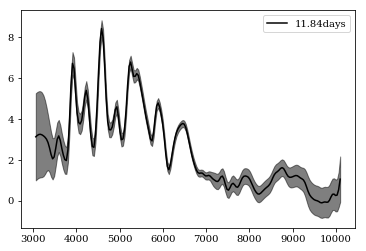

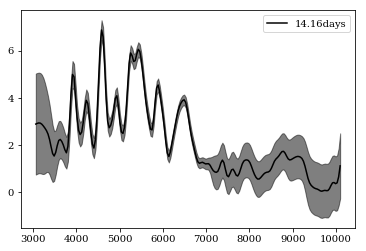

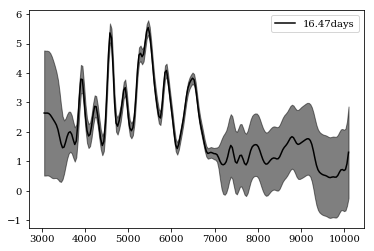

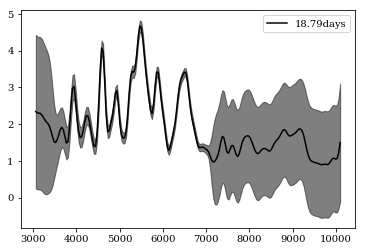

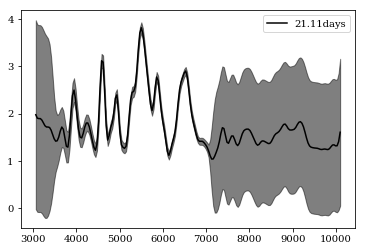

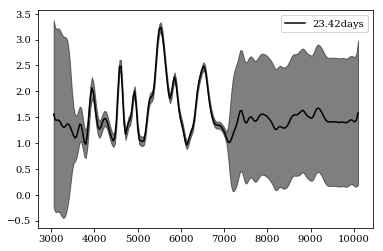

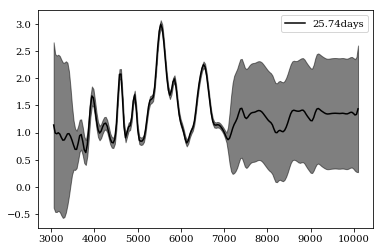

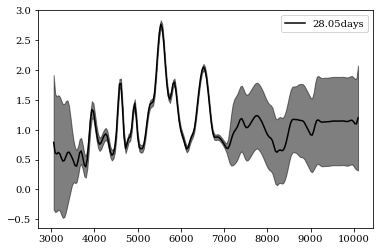

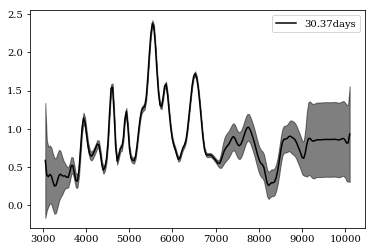

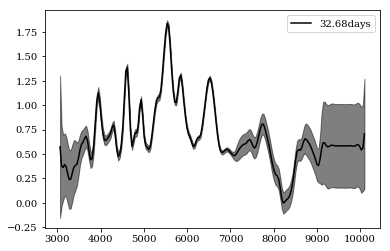

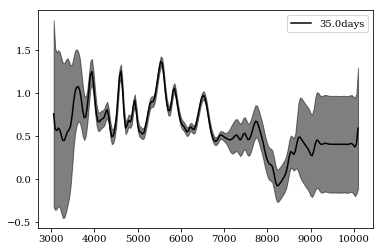

In [247]:
pind = int(len(phases)/2.)
phasearr = np.linspace(-9, 35, 20)
for p in phasearr:
#     wave = np.linspace(4000,7000,200)
    wave = np.linspace(waves[0],waves[-1],200)
    xa = np.vstack([[p]*200,wave]).T
#         print(xa)
    pred_f, pred_var_f = gp.predict(y, xa, return_var=True)
    xphase = x[:,0]
    idx = np.array(xphase==p)
    plt.plot(wave,pred_f,color='k', label = str(np.round(p,2)) + 'days')
    plt.fill_between(wave,pred_f-np.sqrt(pred_var_f),pred_f+np.sqrt(pred_var_f),alpha=0.5,color='k')
    plt.legend()
    plt.show()